<a href="https://colab.research.google.com/github/totallyguapo/vigilant-CART/blob/main/A01/GAIB_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Google Colab setup


Google Colab is a cloud-based Jupyter Notebook. It allows you to write and execute code, displaying the output directly within the interface. One of its key features is ”free” access to a GPU, making it especially valuable for tasks like training deep learning models that benefit from parallel processing.

## Pre-installed Libraries
Google Colab is equipped with pre-installed Python libraries, including TensorFlow, PyTorch, and Keras. This eliminates the need for manual installations, enabling you to start coding immediately.

## Integration with Google Drive
With automatic saving to Google Drive, Google Colab ensures your work is never lost, even if you forget to save manually. This feature provides peace of mind and seamless access to your projects.

## Collaboration and Sharing
Google Colab incorporates the collaborative functionality of Google Docs, allowing you to share notebooks, receive comments, and work on them simultaneously with others in real time. This makes it an excellent tool for team projects or educational purposes.





A Colab notebook contains narrative text and code.

For example, this <mark>cell</mark> is written using [Markdown](https://www.markdownguide.org/cheat-sheet/) (pretty useful to learn!)

Below, there is a code cell. Run it by pressing the “play” button in the left

In [ ]:
# Make sure you choose a runtime environment
# Depending on what you are doing, you will need a CPU or GPU.
# However, when doing GenAI, most of the time we are going to need
# a GPU.

# Runtime -> Change Runtime Type

# Then, press "Connect" in the upper right section of the browser

# Comparison of Colab GPUs
# http://mccormickml.com/2024/04/23/colab-gpus-features-and-pricing/


# Greet me with the current time!
import datetime, pytz

current_time = datetime.datetime.now(pytz.timezone('US/Eastern')).strftime("%H:%M")
print(f"Hello CART498, it is {current_time}")


Hello CART498, it is 15:49


# The one command to know

SHIFT + ENTER to run a cell

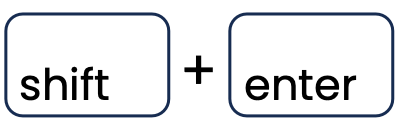

In [ ]:
import torch

# Torch (and PyTorch) PyTorch is one of the most popular frameworks for
#  developing and training machine learning and deep learning models.

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# CUDA (Compute Unified Device Architecture) is a parallel computing platform
# and programming model developed by NVIDIA for their GPUs. CUDA harness the
# highly parallel processing power of GPUs to perform general-purpose computing
# tasks (i.e., tasks beyond traditional graphics rendering).


Using device: cuda


In [ ]:
# If using models from HuggingFace, you may need to generate and setup a token.
# To authenticate with the Hugging Face Hub, create a token in your settings
# tab (https://huggingface.co/settings/tokens), set it as secret in your Google
# Colab and restart your session.
# You will be able to reuse this secret in all of your notebooks.



In [ ]:
# It also possible to mount the Colab session into your Google Drive. More about
# this later :)

# Generating text with transformers

The Transformers Python library, developed by Hugging Face, is an open-source library designed for natural language processing (NLP) and other ML tasks. It
provides a comprehensive framework for working with pre-trained models, especially transformer-based architectures like BERT, GPT, T5, and more. The library offers a unified interface for tasks like text generation, image object detection, and audio transcription.

The library also provides different levels of complexity. If you prefer simplicity, you can use the `pipeline` feature, which handles all the required processing for making predictions. To use it, you just call the `pipeline()` function and specify the task you want, such as text classification.

Documentation and examples can be found in the official repository:

https://github.com/huggingface/transformers

In [ ]:
from transformers import pipeline

# Text classification is a core natural language processing (NLP) task where a
# model is trained to categorize text into predefined labels. Common examples
# of text classification tasks include sentiment analysis (positive, negative,
# neutral), spam detection, topic categorization, and language identification.
# The Transformers library provides pre-trained models for text classification.

classifier = pipeline("text-classification", device=device)
# classifier("The concert was a breathtaking experience, and the musicians were \
# phenomenal.")
# classifier("The painting was intriguing, but I felt it lacked emotional depth.")
# classifier("What is physical love? Half of pleasure.")
# classifier("I'm having a really bad and a really good day.")
classifier("She waled to the mall.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9339510202407837}]

Spend a few minutes experimenting with different phrases to identify one where the model struggles—specifically, where it shows the lowest confidence score. What phrase causes the model to be least confident in its prediction?

In [ ]:
# Transformers can also be used for generation

# Initialize a text-generation pipeline
generator = pipeline("text-generation", model="openai-community/gpt2", device=device)

# Prompt to be used for continuation
# prompt = "The purpose of surrealist visual techniques"
prompt = "User: Computer, can you explain Surrealism for me?\nAI:"


# Generate text
output = generator(prompt, max_length=50, num_return_sequences=1)

# Access the generated text
generated_text = output[0]["generated_text"]

import textwrap
# Format the text (example: remove extra spaces, capitalize, or reformat)
formatted_text = generated_text.strip()  # Remove leading/trailing spaces

# Split the output text at 80 characters (for display purposes)
formatted_text = textwrap.fill(formatted_text, width=80)

# Print the formatted output
print(formatted_text)



Device set to use cuda
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


User: Computer, can you explain Surrealism for me? AI: What's Surrealism? AI:
Surrealism is not as intuitive to me as it has to you. You can't see things that
aren't there,


Run the above cell multiple times and observe how the text-generation task produces different results. Do all of them seem plausible? Which ones are accurate, and how can you determine their correctness?

# Generating audio with Transformers

The Transformers library include models capable of generating audio, including music. One model for this purpose is MusicGen, which was developed by Meta AI. The MusicGen-Small variant is a lightweight model (low RAM footprint) designed to generate music based on a textual prompt.

In [ ]:
from transformers import pipeline

# Generating sound clips
pipe = pipeline("text-to-audio", model="facebook/musicgen-small", device=device)

# data = pipe("chill groove for a winter afternoon")
# data = pipe("upbeat groove for a sunny summer morning")
data = pipe("song in the style of violeta parra")

Config of the text_encoder: <class 'transformers.models.t5.modeling_t5.T5EncoderModel'> is overwritten by shared text_encoder config: T5Config {
  "_name_or_path": "t5-base",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_be

In [ ]:
print(data)

{'audio': array([[[-0.03217619, -0.03049885, -0.02984148, ...,  0.07054743,
          0.04944801,  0.06788147]]], dtype=float32), 'sampling_rate': 32000}


In [ ]:
import IPython.display as ipd

display(ipd.Audio(data["audio"][0], rate=data["sampling_rate"]))

Spend a few minutes experimenting with different prompts to “create music” inspired by the traditional sounds and styles of your home country.

# Basic image generation with Diffusers

The Diffusers library is developed and maintained by Hugging Face. It comes with several diffusion models for image, video, and audio generation.

You can find the source code and documentation on GitHub:

https://github.com/huggingface/diffusers

In [ ]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "Lykon/dreamshaper-8",
    torch_dtype=torch.float16,
    variant="fp16",
    ).to(device)

In [ ]:
prompt = "A detailed, hyperrealistic view of a park, with people enjoying \
barbecues and playing pétanque."
pipe(prompt).images[0]

In [ ]:
# We can also use other diffusion models, for example stable diffusion, hosted
# by RunwayML on HuggingFace

model_id = "runwayml/stable-diffusion-v1-5"  # or any other compatible model
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16)
pipe = pipe.to(device)  # move to GPU if available


In [ ]:
prompt = "A detailed, hyperrealistic view of a park, with people enjoying \
barbecues and playing pétanque."
pipe(prompt).images[0]

In [ ]:
# Define your prompt
prompt = (
    "A 1950s diner on Mars with hovering cars parked outside, "
    "in the style of Brazilian bossa nova and MPB album covers, "
    "cinematic lighting, detailed scene, hyperrealistic textures, "
)


# Generate and save the image
image = pipe(prompt).images[0]
image

# If instead of displaying the resulting media object we want to save it to the
# Linux machine where you are running your code, you can do:
image.save("surreal_diner.png")

Note that this file, “surreal_diner.png”, will be saved in the current folder. You can see this folder by pressing the Folder icon in the left of the browser.

From there, you can preview or download your file.

# Connecting Google Drive

Additionally, you can access the files from your machine. In Google Colab, you mount Google Drive to access files stored in your Drive.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


After running the cell, you'll see a URL link to connect to your Google
Account. Click on the link and sign in. Sometimes, you can be required to copy
an authentication code. Go back to Colab, paste the code into the prompt, and press Enter. If correctly mounted, you will see a new "drive" folder on Colab.

Your Google Drive files will be available under the directory

`/content/drive/MyDrive/`

In [ ]:
# You can check and navigate the mounted path by
!ls /content/drive/MyDrive/

## Tips for prompt crafting

### Use adjectives and descriptive phrases

Mention colors, lighting conditions (“neon-lit,” “soft glow,” “dramatic shadows”), and stylistic references (“in the style of a watercolor painting,” “like a 1980s movie poster,” etc.) to guide the AI.

### Combine contrasting themes

Mashing up futuristic and historical, organic and mechanical, or whimsical and eerie can lead to surprising and intriguing results.

### Specify art styles

References to artistic movements (Impressionism, Surrealism, Baroque) or artists (Van Gogh, Frida Kahlo, etc.) help the AI lock onto specific visual aesthetics.

### Experiment with point of view

Ask for close-up shots, wide-angle perspectives, or overhead views to see how composition changes the output.

### Iterate and refine

Start with a broad prompt, then add or replace adjectives and details in subsequent generations to see how small adjustments affect the final images.

<mark>Play with these ideas and push your prompts to understand both the strengths and quirks of generative image models.</mark>